**J Matheus**

# **Casilla de código base (Ejecute siempre antes de usar el solucionador, no modifique).**

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sympy import sympify, lambdify, symbols
from sympy.core.sympify import SympifyError

# (La clase BisectionSolver que ya tienes iría aquí arriba...)

class FalsePositionSolver:
    """
    Implementa el método de Falsa Posición (Regula Falsi).
    """

    def __init__(self, f):
        if not callable(f):
            raise TypeError("El parámetro 'f' debe ser una función (callable).")
        self.f = f
        self.iterations = 0
        self.root = None
        self.error = None
        self.history = []
        self._initial_a = None
        self._initial_b = None

    def solve(self, a, b, tol=1e-7, max_iter=100):
        self.iterations = 0
        self.root = None
        self.error = None
        self.history = []
        self._initial_a = a
        self._initial_b = b

        current_a = a
        current_b = b
        fa = self.f(current_a)
        fb = self.f(current_b)

        if fa * fb >= 0:
            raise ValueError(f"Falsa Posición falló. f(a) y f(b) deben tener signos opuestos. "
                             f"f({a})={fa:.4f}, f({b})={fb:.4f}")

        c = current_a

        for i in range(max_iter):
            self.iterations = i + 1

            if (fb - fa) == 0:
                raise RuntimeError("División por cero: f(b) - f(a) es cero.")

            c_nuevo = current_b - (fb * (current_b - current_a)) / (fb - fa)

            fc = self.f(c_nuevo)

            current_error_fc = abs(fc)
            current_error_step = abs(c_nuevo - c)
            c = c_nuevo

            self.history.append({
                'iteration': self.iterations,
                'a': current_a,
                'b': current_b,
                'c': c,
                'fc': fc,
                'error': current_error_step
            })

            if current_error_fc < tol:
                self.root = c
                self.error = current_error_fc
                return c

            if fa * fc < 0:
                current_b = c
                fb = fc
            else:
                current_a = c
                fa = fc

        self.root = c
        self.error = abs(self.f(c))
        print(f"\nAdvertencia: Se alcanzó el máximo de iteraciones ({max_iter}) "
              f"sin alcanzar la tolerancia de {tol}.")
        print(f"Mejor aproximación: {self.root} con error |f(c)| de {self.error:.2e}")
        return self.root

    def plot_results(self):
        if self.root is None or not self.history:
            print("Error: Ejecute el método 'solve()' antes de intentar graficar.")
            return

        plot_range_start = self._initial_a - abs(self._initial_b - self._initial_a) * 0.1
        plot_range_end = self._initial_b + abs(self._initial_b - self._initial_a) * 0.1

        x_vals = np.linspace(plot_range_start, plot_range_end, 500)
        y_vals = np.array([self.f(xi) for xi in x_vals])

        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(x_vals, y_vals, label='f(x)')
        plt.axhline(0, color='gray', linestyle='--', linewidth=0.8, label='y=0')
        plt.axvline(self._initial_a, color='green', linestyle=':', label='Intervalo inicial [a, b]')
        plt.axvline(self._initial_b, color='green', linestyle=':')
        plt.plot(self.root, self.f(self.root), 'ro', markersize=8, label=f'Raíz encontrada ({self.root:.4f})')
        plt.title('Función y Raíz (Falsa Posición)')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.grid(True)
        plt.legend()

        plt.subplot(1, 2, 2)
        iterations = [entry['iteration'] for entry in self.history]
        errors = [abs(entry['fc']) for entry in self.history]

        plt.semilogy(iterations, errors, '-o', label='Error |f(c)|')
        plt.title('Convergencia (Falsa Posición)')
        plt.xlabel('Iteración')
        plt.ylabel('Error |f(c)| (log scale)')
        plt.grid(True, which="both", ls="--", c='0.7')
        plt.legend()

        plt.tight_layout()
        plt.show()

#*Solucionador; ejecute la siguiente casilla y siga los pasos para obtener los resultados. Utilicelo cuántas veces sea necesario.*

--- Solucionador de Ecuaciones (Método de Falsa Posición) ---
------------------------------------------------------------
Ingrese la función f(x) (p.ej. x**3 - x - 2): cos(x) -x 
Función a resolver: f(x) = -x + cos(x)
------------------------------------------------------------
Ingrese el límite inferior del intervalo (a): 0
Ingrese el límite superior del intervalo (b): 1
Ingrese la tolerancia (o presione Enter para 1e-7): 
Usando tolerancia por defecto: 1e-07

Iniciando FalsePositionSolver para f(x) en [0.0, 1.0]...

--- Resultados Técnicos del Solver ---
Raíz encontrada:     0.73908512
Valor de f(raíz):    2.94e-08
Iteraciones:         6
Error estimado |f(c)|: 2.94e-08

      --- Resumen de Estimación para el Cliente ---

Proyecto: Análisis de la función f(x) = -x + cos(x)

> **1. Problema:**
> Se nos solicitó encontrar el 'punto de equilibrio' (raíz) de la función, es decir, 
> el valor de 'x' para el cual la función es igual a cero.

> **2. Estimación de la Solución:**
> El valor 

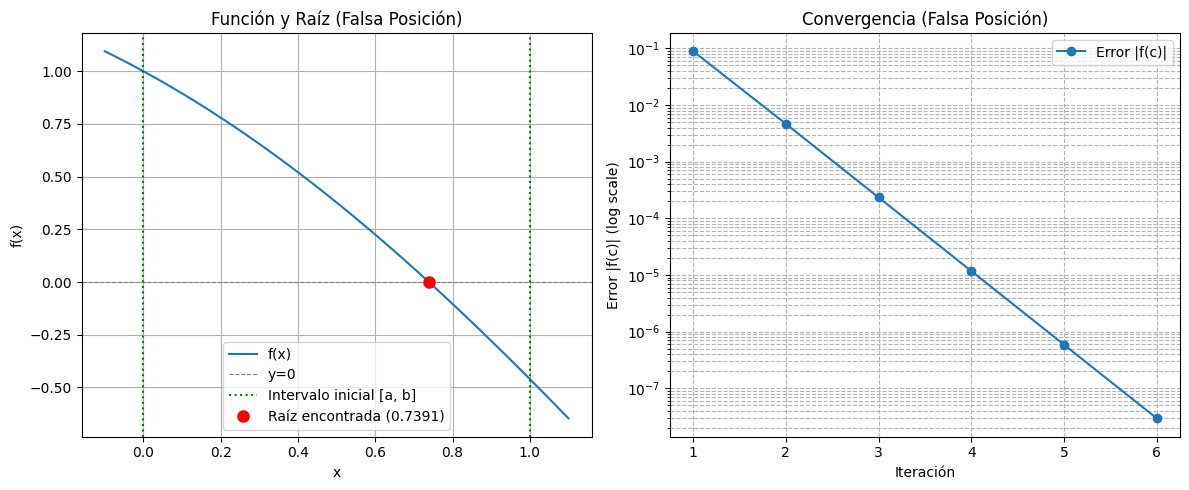

In [3]:
# --- Script de Prueba Interactivo (con Resumen para Cliente) ---

print("--- Solucionador de Ecuaciones (Método de Falsa Posición) ---")
print("-" * 60)

try:
    # --- 1. Pedir Función ---
    func_string = input("Ingrese la función f(x) (p.ej. x**3 - x - 2): ")

    x = symbols('x')
    expr = sympify(func_string)
    mi_funcion = lambdify(x, expr, 'math')

    print(f"Función a resolver: f(x) = {expr}")
    print("-" * 60)

    # --- 2. Pedir Intervalo ---
    a_input = input("Ingrese el límite inferior del intervalo (a): ")
    a_val = float(a_input)

    b_input = input("Ingrese el límite superior del intervalo (b): ")
    b_val = float(b_input)

    # --- 3. Pedir Tolerancia ---
    tol_input = input(f"Ingrese la tolerancia (o presione Enter para 1e-7): ")

    if tol_input == "":
        tol_val = 1e-7
        print(f"Usando tolerancia por defecto: {tol_val}")
    else:
        tol_val = float(tol_input)

    # --- 4. Crear y usar el solver ---
    solver_falsapos = FalsePositionSolver(f=mi_funcion)

    print(f"\nIniciando FalsePositionSolver para f(x) en [{a_val}, {b_val}]...")
    raiz_aprox = solver_falsapos.solve(a=a_val, b=b_val, tol=tol_val)

    # --- 5. Calcular f(raíz) para usarlo en ambos reportes ---
    f_en_raiz = mi_funcion(solver_falsapos.root)

    # --- 6. Reporte Técnico ---
    print("\n--- Resultados Técnicos del Solver ---")
    print(f"Raíz encontrada:     {solver_falsapos.root:.8f}")
    print(f"Valor de f(raíz):    {f_en_raiz:.2e}")
    print(f"Iteraciones:         {solver_falsapos.iterations}")
    print(f"Error estimado |f(c)|: {solver_falsapos.error:.2e}")

    # --- 7. NUEVO: Resumen para el Cliente ---
    print("\n" + "="*60)
    print("      --- Resumen de Estimación para el Cliente ---")
    print("="*60)
    print(f"\nProyecto: Análisis de la función f(x) = {expr}")

    print("\n> **1. Problema:**")
    print(f"> Se nos solicitó encontrar el 'punto de equilibrio' (raíz) de la función, es decir, \n> el valor de 'x' para el cual la función es igual a cero.")

    print("\n> **2. Estimación de la Solución:**")
    print(f"> El valor de 'x' que resuelve la ecuación es: **{solver_falsapos.root:.10f}**")

    print("\n> **3. Nivel de Confianza (Precisión):**")
    print(f"> La estimación es de alta precisión. Al evaluar la función en este punto, el resultado es \n> {f_en_raiz:.2e} (un número extremadamente cercano a cero).")
    print(f"> El cálculo se completó eficientemente en **{solver_falsapos.iterations} pasos**.")

    print("\n> **4. Visualización:**")
    print(f"> A continuación, se presentan los gráficos que ilustran la solución encontrada y la \n> eficiencia del método.")
    print("="*60 + "\n")

    # --- 8. Generar los GRÁFICOS ---
    # (Los gráficos ahora sirven como 'Apéndice' del resumen)
    solver_falsapos.plot_results()

except (SympifyError, ValueError, RuntimeError) as e:
    print(f"\n[ERROR] Ocurrió un problema:")
    print(f"{e}")
except Exception as e:
    print(f"\n[ERROR INESPERADO] {e}")